In [1]:
# A few small experiments with frequency domain ananlysis of the heart-rate data
# I am using a little bit of this in the interval-cycling notebook

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

In [3]:
from scipy import fftpack
from scipy import signal

In [4]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

412 412


In [5]:
# Plot activities with HIGHEST attribute

# argpartition is used to collect the right indices, see:
#https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array

attribute='peakZone' # 'meanBPM'
nPlots=5

y=[d[attribute] for d in Summaries]
y=np.array(y)
#print(np.sort(y))

toPlot=np.argpartition(y, -nPlots)[-nPlots:]
#print('\n',toPlot,'\n',y[toPlot],'\n',np.sort(y[toPlot]))

#plotHeartRate(toPlot,DFs,Summaries)

In [6]:
index=toPlot[3]
print(Summaries[index],len(DFs[index]) )

{'string': '2020-07-22 0:59:19 127.0', 'date': datetime.date(2020, 7, 22), 'meanBPM': 127.0, 'maxBPM': 154, 'duration': datetime.timedelta(seconds=3559), 'peakZone': 437, 'fileName': 'Physical Activity\\heart_rate-2020-07-22.json'} 1526


length  1526 t  0 5 ... 7620 7625
x  87 87 ... 142 141


(-0.01, 0.01)

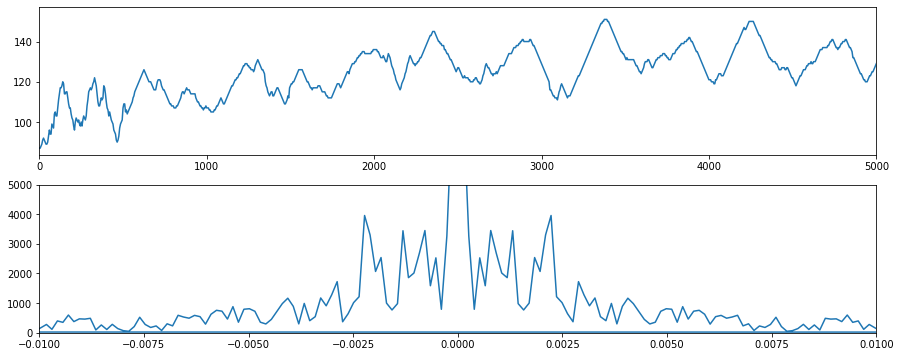

In [7]:
df=DFs[index]
#df=df[:1000]
length=len(df)
t = np.arange(start=0, stop=5*length, step=5)
print( 'length ',length,'t ',t[0],t[1],'...',t[-2],t[-1] )
x = df['BPM'] 
print('x ',x[0],x[1],'...',x[length-2],x[length-1])

X = fftpack.fft(x)
frequencies=fftpack.fftfreq(n=length,d=5)  # Sample spacing of 5 seconds

figure, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))
ax0.plot(t,x)
ax0.set_xlim(0,5000)
ax1.plot(frequencies, np.abs(X))
ax1.set_ylim(0, 5000)
ax1.set_xlim(-0.01, +0.01)

In [8]:
nFrequencies=5
values=np.abs(X)
topFrequencies=np.argpartition(values, -nFrequencies)[-nFrequencies:]
print('\n',frequencies[topFrequencies],'\n',values[topFrequencies].round(2))


 [ 0.00222805 -0.00222805 -0.00013106  0.00013106  0.        ] 
 [  3955.82   3955.82   7683.94   7683.94 194423.  ]


(-0.005, 0.005)

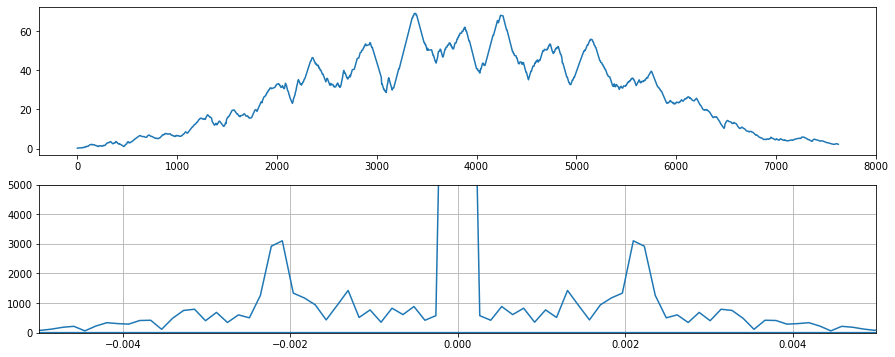

In [9]:
# Kaiser windwoing to smooth the signal 

win = np.kaiser(len(t), 5)
x_win=(x-80) * win          # Smoothing by Kaiser window (beta=10) and removing the DC (80)
X_win = fftpack.fft( x_win)

frequencies=fftpack.fftfreq(n=length,d=5)  # Sample spacing of 5 seconds

figure, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))
ax0.plot(t,x_win)
ax1.plot(frequencies, np.abs(X_win))
ax1.set_ylim(0, 5000)
ax1.grid(True)
ax1.set_xlim(-0.005, +0.005)

In [10]:
nFrequencies=7
values=np.abs(X_win)
topFrequencies=np.argpartition(values, -nFrequencies)[-nFrequencies:]
print('\n',frequencies[topFrequencies],'\n',values[topFrequencies].round(2))


 [ 0.00222805  0.00209699 -0.00209699 -0.00222805 -0.00013106  0.00013106
  0.        ] 
 [ 2921.33  3102.91  3102.91  2921.33 19464.86 19464.86 42151.76]


500.0


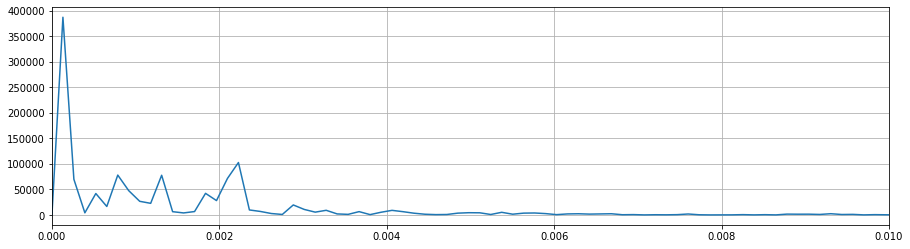

In [11]:
# Simpler Period-gram

(period,power)=signal.periodogram(x,fs=1/5.0)  # Sample spacing of 5 seconds, frequncy 1/5

figure, ax0 = plt.subplots(1, 1, figsize=(15, 4))
ax0.plot(period,power)
ax0.set_xlim(0, 0.01)
ax0.grid(True)
print(1/0.002)

# Original Code

(-0.2, 0.2)

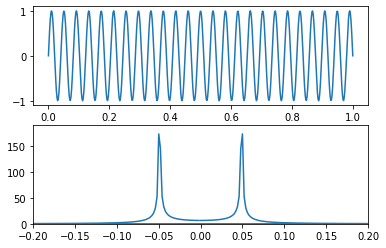

In [12]:
#https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

from scipy import fftpack

t = np.linspace(0, 1, 500)
x = np.sin(49 * np.pi * t)

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(t,x)
ax0.set_ylim(-1.1, 1.1)

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 190)
ax1.set_xlim(-0.2, 0.2)